In [25]:
import sys
import os
from tqdm import tqdm

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

import torch
import torch.nn.functional as F
from Models.PtychoFormer import PtychoFormer
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchvision.transforms.functional import resize

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
# Define the path to the directory containing the PNG images
data_dir = '/home/xguo50/PtychoFormer/real_data_xin/01'

# Get a list of all PNG files in the directory
png_files = [f for f in os.listdir(data_dir) if f.endswith('.PNG')]

In [27]:
print(png_files)
tensors = []
img_indices = list(range(1, 6)) + list(range(11, 16)) + list(range(21, 26)) + list(range(31, 36)) + list(range(41, 46))
for file in png_files[:25]: 
    img_path = os.path.join(data_dir, file)
    tensor = read_image(img_path)
    tensor = resize(tensor, [400, 400])
    tensors.append(tensor)

diff_tensor = torch.stack(tensors)

print(diff_tensor.shape)
result_tensor = diff_tensor.permute(1, 0, 2, 3)
print(result_tensor.shape)

tensorsthree = []
for file in png_files[:9]: 
    img_path = os.path.join(data_dir, file)
    tensor = read_image(img_path)
    tensor = resize(tensor, [400, 400])
    tensorsthree.append(tensor)

diff_tensorthree = torch.stack(tensorsthree)

print(diff_tensorthree.shape)
result_tensorthree = diff_tensorthree.permute(1, 0, 2, 3)
print(result_tensorthree.shape)

['10.PNG', '11.PNG', '1.PNG', '14.PNG', '12.PNG', '13.PNG', '17.PNG', '15.PNG', '16.PNG', '18.PNG', '19.PNG', '2.PNG', '20.PNG', '22.PNG', '21.PNG', '24.PNG', '25.PNG', '23.PNG', '28.PNG', '3.PNG', '27.PNG', '30.PNG', '32.PNG', '26.PNG', '33.PNG', '29.PNG', '31.PNG', '35.PNG', '36.PNG', '34.PNG', '37.PNG', '38.PNG', '39.PNG', '40.PNG', '41.PNG', '4.PNG', '42.PNG', '44.PNG', '43.PNG', '45.PNG', '47.PNG', '46.PNG', '49.PNG', '5.PNG', '48.PNG', '50.PNG', '52.PNG', '51.PNG', '53.PNG', '54.PNG', '55.PNG', '56.PNG', '57.PNG', '58.PNG', '6.PNG', '59.PNG', '60.PNG', '61.PNG', '63.PNG', '62.PNG', '65.PNG', '64.PNG', '66.PNG', '68.PNG', '69.PNG', '67.PNG', '7.PNG', '70.PNG', '8.PNG', '9.PNG']
torch.Size([25, 1, 400, 400])
torch.Size([1, 25, 400, 400])
torch.Size([9, 1, 400, 400])
torch.Size([1, 9, 400, 400])


In [28]:
model = PtychoFormer().to(device)
checkpoint_path = '/home/xguo50/PtychoFormer/attempt5by5.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint["model"])
model.eval() 

PtychoFormer(
  (encoder): PtychoFormerEncoder(
    (stages): ModuleList(
      (0): PtychoFormerEncoderStage(
        (overlap_patch_merge): OverlapPatchMerging(
          (0): Conv2d(25, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
          (1): LayerNorm2d((64,), eps=1e-05, elementwise_affine=True)
        )
        (blocks): Sequential(
          (0): PtychoFormerEncoderBlock(
            (0): ResidualAdd(
              (fn): Sequential(
                (0): LayerNorm2d((64,), eps=1e-05, elementwise_affine=True)
                (1): EfficientMultiHeadAttention(
                  (reducer): Sequential(
                    (0): Conv2d(64, 64, kernel_size=(8, 8), stride=(8, 8))
                    (1): LayerNorm2d((64,), eps=1e-05, elementwise_affine=True)
                  )
                  (att): MultiheadAttention(
                    (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
                  )
                

In [29]:
# diffraction_input = data['input']
# diffraction_input = preprocess_diffraction(diffraction_input)
# print(diffraction_input.shape)

with torch.no_grad():
    result_tensor = result_tensor.to(device).float()
    prediction = model(result_tensor)
print(prediction.shape)

torch.Size([1, 2, 400, 400])


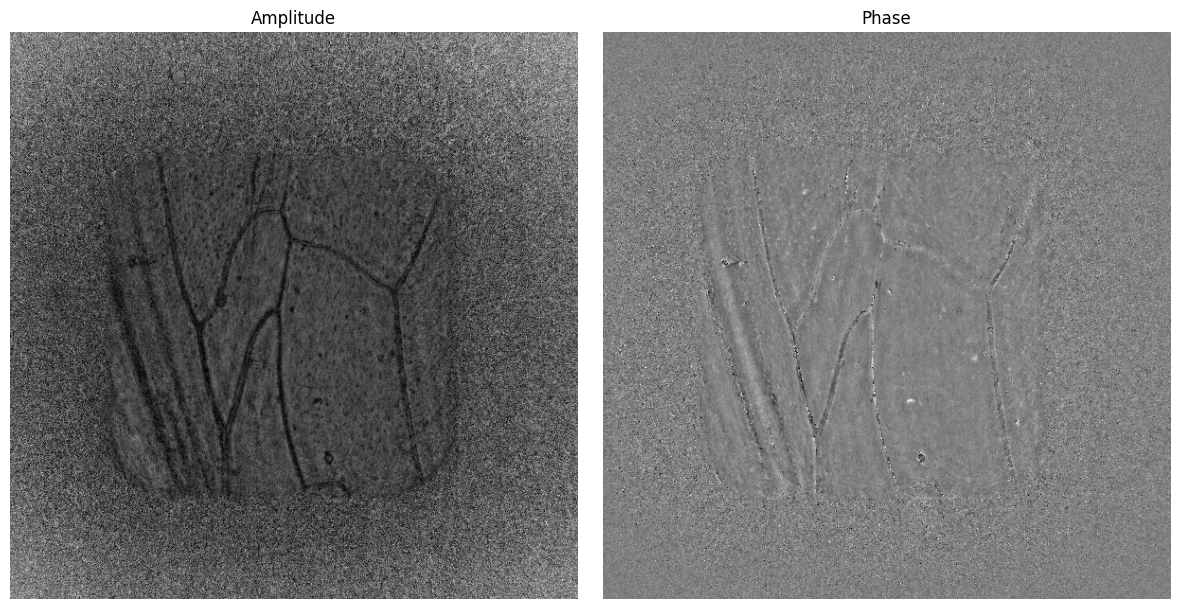

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Load your images
image_path = '/home/xguo50/PtychoFormer/real_data_xin/01/absolute.png'
label_amp = read_image(image_path)
image_path = '/home/xguo50/PtychoFormer/real_data_xin/01/phase.png'
label_phase = read_image(image_path)

# Convert tensors to numpy arrays if they aren't already
if hasattr(label_amp, 'cpu'):
    label_amp = label_amp.cpu().detach().numpy()
if hasattr(label_phase, 'cpu'):
    label_phase = label_phase.cpu().detach().numpy()

# Transpose the dimensions from (channels, height, width) to (height, width, channels)
# Or select just one channel if it's a multi-channel image
if label_amp.ndim == 3 and label_amp.shape[0] in [3, 4]:  # If in format (channels, height, width)
    label_amp = np.transpose(label_amp, (1, 2, 0))  # Convert to (height, width, channels)
    # If you only want to show one channel:
    # label_amp = label_amp[:,:,0]  # Show just the first channel

if label_phase.ndim == 3 and label_phase.shape[0] in [3, 4]:
    label_phase = np.transpose(label_phase, (1, 2, 0))
    # label_phase = label_phase[:,:,0]  # Uncomment if you want just one channel

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Display amplitude image on the left
plt.subplot(1, 2, 1)
plt.imshow(label_amp, cmap='gray')  # Use cmap='gray' for grayscale or remove for color
plt.title("Amplitude")
plt.axis('off')

# Display phase image on the right
plt.subplot(1, 2, 2)
plt.imshow(label_phase, cmap='gray')
plt.title("Phase")
plt.axis('off')

plt.tight_layout()
plt.show()

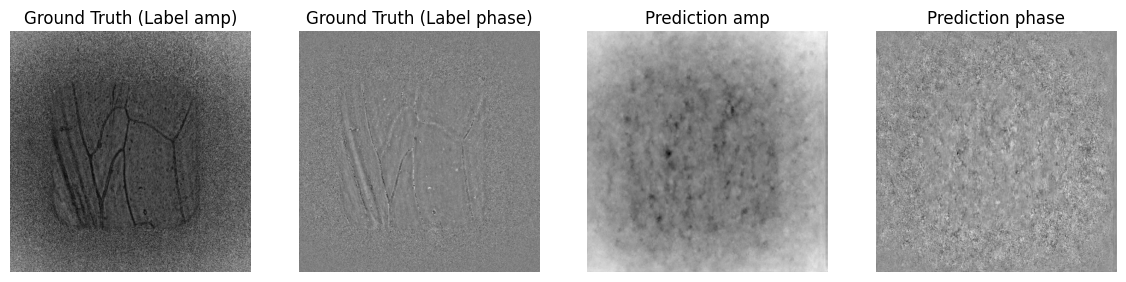

In [31]:
pred_amp = prediction[0, 0].cpu().detach().numpy()
pred_phase = prediction[0,1].cpu().detach().numpy()

plt.figure(figsize=(18, 6))
# plt.subplot(1, 5, 1)
# plt.imshow(input_img, cmap='gray')
# plt.title(f"Diffraction Pattern (Input)")
# plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(label_amp, cmap='gray')
plt.title("Ground Truth (Label amp)")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(label_phase, cmap='gray')
plt.title("Ground Truth (Label phase)")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(pred_amp, cmap='gray')
plt.title("Prediction amp")
plt.axis("off")


plt.subplot(1, 5, 5)
plt.imshow(pred_phase, cmap='gray')
plt.title("Prediction phase")
plt.axis("off")
plt.show()

torch.Size([25, 1, 400, 400])


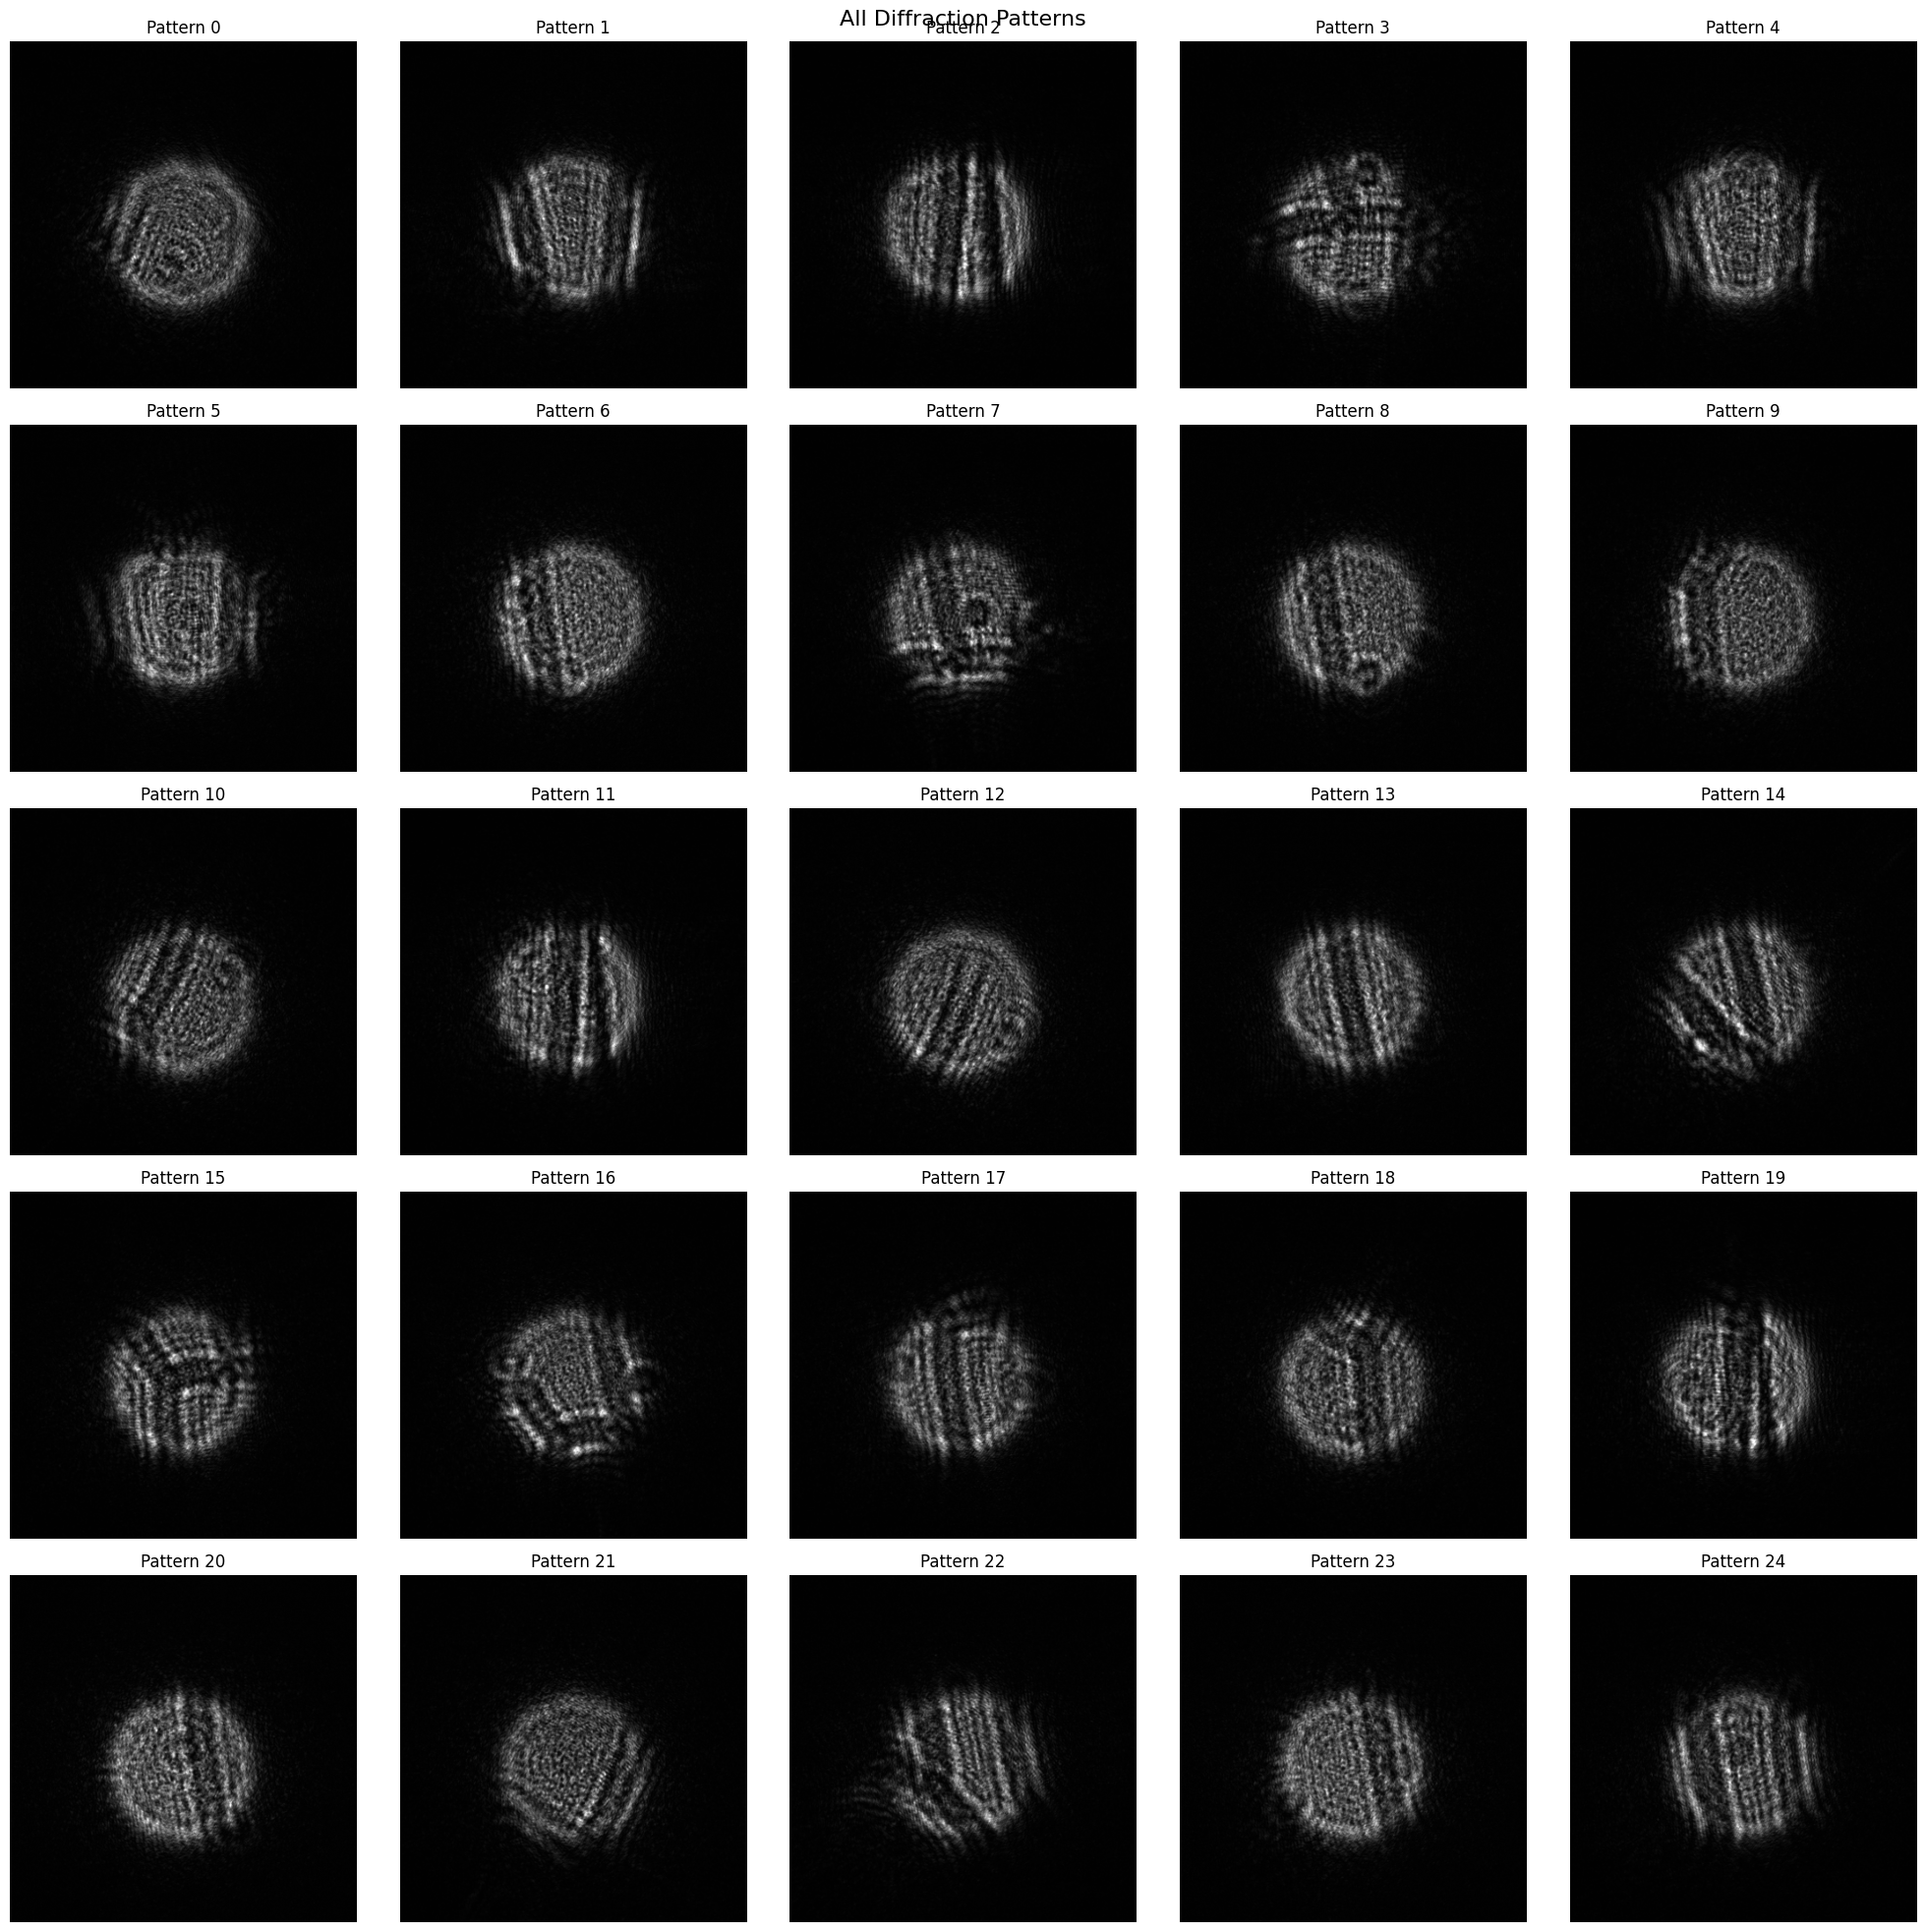

In [32]:
patterns = diff_tensor
print(patterns.shape)

fig, axs = plt.subplots(5, 5, figsize=(20, 20)) 
fig.suptitle("All Diffraction Patterns", fontsize=16)
for i in range(25):  
    row = i // 5  
    col = i % 5  

    pattern = patterns[i, 0].cpu().numpy()
    
    axs[row, col].imshow(pattern, cmap='gray')
    axs[row, col].set_title(f"Pattern {i}")
    axs[row, col].axis('off')
plt.tight_layout()
plt.show()